# The Closed Economy, One-Period Macroeconomic Model 

This notebook illustrates how to code the One-Period Macroeconomic Model in Python and two scenarios for the One-Period Model.  The model is based from *Macroeconomics, Fifth Edition* by Williamson (2014). 

[Quant Econ](https://quantecon.org/) and [NumEconCopenhagen](https://numeconcopenhagen.netlify.app/lectures/Optimize_print_and_plot) are useful resources that informed me in writing this notebook. 

## Table of Contents
- [Government Expenditures](#G)
- [The Competitive Equilibrium](#CompEq)
- [A Python Class for the Model](#PyClassMod)
- [The Pareto Optimum](#ParetoOp)
- [Scenario I: A Change in Government Expenditures (G)](#ChangeinG)
- [Scenario II: A Change in The Total Factor Productivity (TFP)](#ChangeInTFP)
- [The Substitution Effect](#SE)

## Government Expenditures <a name="G"></a>

The Closed-Economy, One-Period Model is a culmination of prior notes on the Representative Consumer and the Representative Firm. While we have discussed various aspects of the simplified model such as labour demand and labour supply, we have yet to explore the role of Government and fiscal policy.

The role of government is simple. The government wishes to purchase some quantity of consumption goods, $G$ and finances these goods via taxation $T$. $G$ is exogenous. This means that $G$ is unaffected regardless of what happens in the economy. Since the government operates in a one-period environment, borrowing money to finance more government expenditures isn't allowed. This is because there is no future in which the government can repay its debts. With this in mind, government expenditures is equal to taxation.

$$(eq.1) \quad G = T$$

This means that the government cannot run deficits and therefore the government budget deficit will always be zero. 

## The Competitive Equilibrium <a name="CompEq"></a>

Before exploring the competitive equilibrium, let us recap the model equations for the Representative Consumer and the Representative Firm. First, we have the representative consumer's utility maximization problem:

$$(eq.2) \quad  \max_{C,l} U(C, L) = l^{\alpha}C^{1-\alpha}$$

$$subject\;to$$

$$(eq.3) \quad C = -wl + wh + \pi - T$$


where $C\geq0$, $w>0$, $\pi>0$, $T>0$, $G=T$, and $0\leq l\leq h$. Note that $\alpha_{cons}$ is leisure as a share of utility, $\alpha_{cons}$=0.3. The optimization condition for the consumer is defined as:

$$(eq.4) \quad MRS_{C,l} = \frac{MU_{l}}{MU_{C}} = w$$

Where $MRS_{C,l}$ is the Marginal Rate of Substitution which is equal to the real wage, $w$. $MU_{l}$ is the marginal utility of consumption and $MU_{C}$ is the marginal utility of leisure:

$$(eq.5) \quad MU_{l} = C^{1 - \alpha_{cons}}\alpha_{cons} l^{\alpha_{cons}-1}$$
$$(eq.6) \quad MU_{C} = l^{\alpha_{cons}}(1 - \alpha_{cons})C^{-\alpha_{cons}}$$

Next, we have the representative firm's profit maximization problem:

$$(eq.7) \quad \max_{N_{d}} \pi = zK^{\alpha_{firm}}(N^{d})^{1-\alpha_{firm}} - wN_{d}$$ 

where $z > 0$, $N^{d} \geq 0$, $K \geq 0$. $K$ is fixed at some level $\bar{K}$. $\alpha_{firm}$ is the capital share of output, $\alpha_{firm}$=0.3. When solving the optimization problem, a unique interior solution arises where the marginal product of labour ($MU_{N}$) is equal to the real wage:

$$(eq.8) \quad MU_{N} = w$$
$$(eq.9) \quad zK^{\alpha_{firm}}(1-\alpha_{firm})N_d^{-\alpha_{firm}} = w$$

With the aforementioned equations in mind, under the competitive equilibrium, the representative consumer maximizes his/her utility, $(eq.2)$, subject to the budget constraint, $(eq.3)$. The representative firm maximizes profits, $(eq.7)$, and government expenditure is exogenous and is equal to a level of lump-sum taxation, $(eq.1)$. The market in which labour is exchanged for consumption good clears. 

Solving the optimization problem for the representative consumer allows us to obtain the marginal rate of substitution (MRS) which is equal to the real wage, $w$:

$$MRS_{C,l} = \frac{MU_{l}}{MU_{C}} = w$$

Where $MU_{l}$ is the marginal utility of consumption:  

$$MU_{l} = C^{1 - \alpha_{cons}}\alpha_{cons} l^{\alpha_{cons}-1}$$

$MU_{C}$ is the marginal utility of leisure:

$$MU_{C} = l^{\alpha_{cons}}(1 - \alpha_{cons})C^{-\alpha_{cons}}$$

Solving the representative firm's maximization problem yields a unique interior solution where the marginal product of labour ($MP_{N}$) is equal to the real wage:

$$MP_{N} = w$$

$$zK^{\alpha_{firm}}(1-\alpha_{firm})N_d^{-\alpha_{firm}} = w$$

The profits for the representative firm is equivalent to the representative consumer's dividend income: 

$$\pi = zK^{\alpha_{firm}}(N^{d})^{1-\alpha_{firm}} - wN_{d}$$ 

The market-clearing condition is where the labour supply, $N^{s}$, equals labour demand, $N^{d}$:

$$h - l = N^{d} = N^{s}$$ 

There are six endogenous variables, $C$, $l$, $N^{d}$, $T$, $\pi$, and $w$, and two exogenous variables, $z$ and $G$. We can simplify the system of equations by substituting $N^{d}$, $T$, and $\pi$ in $(eq.3)$.

$$(eq.3) \quad C = -wl + wh + \pi - T$$

$$C = w(h-l) + zK^{\alpha_{firm}}(N^{d})^{1-\alpha_{firm}} - wN_{d} - G$$

$$C = wN^{d} + zK^{\alpha_{firm}}(N^{d})^{1-\alpha_{firm}} - wN_{d} - G$$

$$C = zK^{\alpha_{firm}}(h-l)^{1-\alpha_{firm}} - G$$

This equation when plotted against $l$ indicates the Production Possibilities Frontier (PPF). Note that slope of the PPF is the Marginal Rate of Transformation (MRT) which is equal to the Marginal Product of Labour ($MP_{N}$) and the real wage ($w$).

$$MRT_{C,l} = -MP_{N} = -w$$

These key equations are accounted for in the `one_period_macromod` class in the section of code below.

## Python Class for the Model <a name="PyClassMod"></a>

To set up the model, I wrote a class containing the necessary functions as object methods to set up the model and some crucial inputs as arguments for the function. To know more about classes here are some useful documentations:
- [Python tutorial on Classes](https://docs.python.org/3/tutorial/classes.html)
- [Python Classes (W3Schools)](https://www.w3schools.com/python/python_classes.asp)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import minimize_scalar 
import pandas as pd

"""
Class for the One-Period Model
"""
class one_period_macromod:
    def __init__(self, 
                 hours,
                 alpha_cons,
                 alpha_firm):
        self.hours = hours
        self.alpha_cons = alpha_cons
        self.alpha_firm = alpha_firm

    def leisure(self): # function for leisure which returns a NumPy array
        return np.linspace(1, self.hours, 500) # return NumPy array for leisure;
    
    def utility_function(self, l, C): # function for utility which returns a NumPy array
        return l**self.alpha_cons * C**(1-self.alpha_cons) # utility function is defined as Cobb-Douglas; return NumPy array for Utility
    
    def consumption(self, cons_level): # function for consumption which returns a NumPy array
        return np.linspace(1, self.cons_level, 100) # return NumPy array for Consumption;
    
    def indifference_curve(self, l, ubar): # we define leisure as the x-axis;
        return ubar**(1/(1-self.alpha_cons)) * l**(-self.alpha_cons/(1-self.alpha_cons)) # return NumPy array for indifference curve(s)
    
    def budget_constraint(self, l, wage, pi, tax): # function for budget constraint
        return (-wage*l) + (wage*self.hours) + (pi - tax) # return budget constraint
    
    def MRS(self, l, C): # function for the marginal rate of substitution
        return ((C**(1 - self.alpha_cons))*self.alpha_cons*(l**(self.alpha_cons-1)))/((l**self.alpha_cons)*(1 - self.alpha_cons)*C**(-self.alpha_cons))
    
    def production_function(self, N, K, z): # production function
        return z*(K**self.alpha_firm)*(N**(1-self.alpha_firm)) # return NumPy array for production function;
    
    def variable_cost(self, w, N): # variable cost in the rep. firm's profit maximization problem 
        return w*N
    
    def MPN(self, K, N, z): # marginal product of labour
        return z*(K**self.alpha_firm)*(1-self.alpha_firm)*(N**-self.alpha_firm)
    
    def MPK(self, K, N, z): # marginal product of capital 
        return z*self.alpha_firm*(K**(self.alpha_firm-1))*(N**(1-self.alpha_firm))
    
    def PPF(self, N, g, K, z): # production possibilities frontier
        return z*(K**self.alpha_firm)*((N)**(1-self.alpha_firm)) - g

After setting up the class, I define the exogenous variables and create an object through which we can call the methods from the `one_period_macromod` class.

In [2]:
"""
Set the exogenous/static variables
"""
hours = 24
alpha_cons = 0.3
alpha_firm = 0.3
g_1 = 50 # tax level/level of government expenditures
K = 100 # a fixed capital stock value
N_bar = 10 # fixed level of labour input - used in the plotting sample.
z_1 = 10 # value of total factor productivity

"""
Set arrays for the One-Period Macroeconomic Model
"""
oneperiod_mod = one_period_macromod(hours, alpha_cons, alpha_firm)
l = oneperiod_mod.leisure() # leisure array;
N = hours - l # array for employment;
Y = oneperiod_mod.production_function(N, K, z_1) # the production function
PPF = oneperiod_mod.PPF(N, g_1, K, z_1) # the production possibilities frontier

"""
Set levels for plotting & the tangent lines
"""
Y_bar = oneperiod_mod.production_function(N_bar, K, z_1)
l_bar = hours-N_bar
w_bar = oneperiod_mod.MPN(K, hours-l_bar, z_1)
PPF_bar = oneperiod_mod.PPF(N_bar, g_1, K, z_1) # the production possibilities frontier at a given input of labour
w = oneperiod_mod.MPN(K, N_bar, z_1) # set slope which is the marginal product of labour at N_bar

# Define tangent line using slope-point form
# y = m*(x - x1) + y1
def tangent_line(x_range, x_bar, y_bar, slope):
    return slope*(x_range - x_bar) + y_bar

# Define x-axis (labour input) range for tangent line
N_range = np.linspace(N_bar-8, N_bar+8, 10)
# Define x-axis (labour input) range for tangent line
l_range = np.linspace(l_bar-8, l_bar+8, 10)

Next, we plot the production function against labour input and leisure and the Production Possibilities Frontier (PPF) against leisure.

(1.0, 29.0, -150.0, 407.4452129644343)

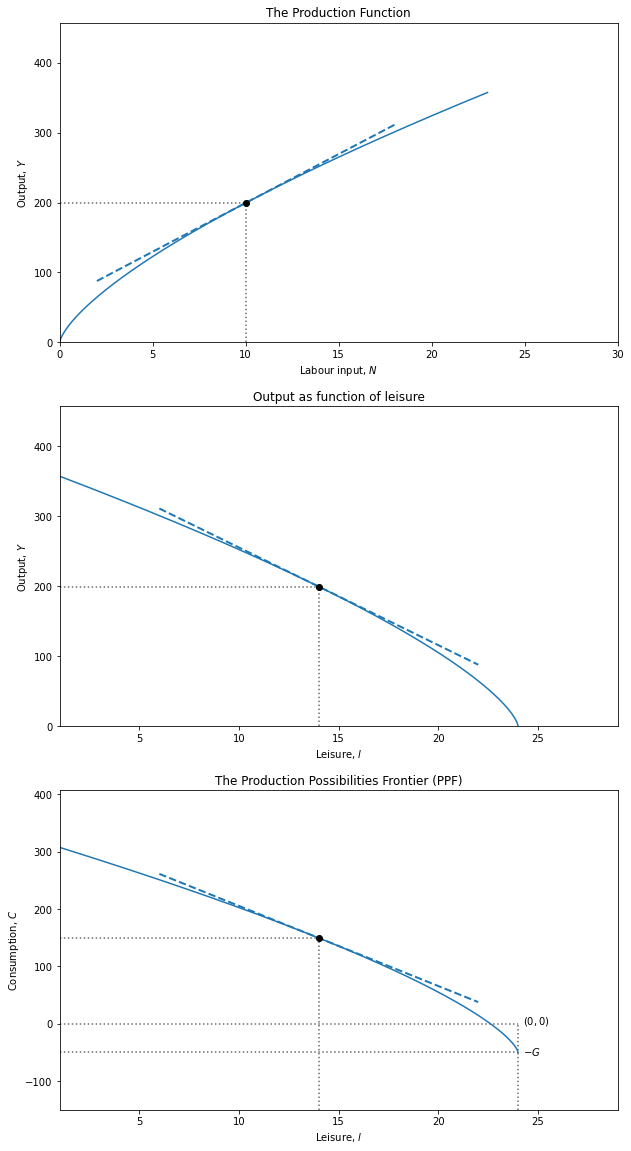

In [3]:
"""
Plot the Production Function and the Production Possibilities Frontier
"""
# Plot the production function
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
# Production Function
ax[0].set(title="The Production Function", xlabel=r'Labour input, $N$', ylabel=r'Output, $Y$')
v = [min(N), max(N)+(30-max(N)), min(Y), max(Y)+100] # values for setting the axes range
ax[0].plot(N, Y) # plot Y against N_d
ax[0].vlines(x=N_bar, ymin=0, ymax=Y_bar, color='dimgrey', linestyles='dotted')
ax[0].hlines(y=Y_bar, xmin=0, xmax=N_bar, color='dimgrey', linestyles='dotted')
ax[0].plot(N_range, tangent_line(N_range, N_bar, Y_bar, w), color='tab:blue', linestyle='dashed', linewidth = 2) # plot the tangent line
ax[0].plot(N_bar, Y_bar,'ro',color='black') # a black dot
ax[0].axis(v)
# Production Function as function of leisure
ax[1].set(title="Output as function of leisure", xlabel=r'Leisure, $l$', ylabel=r'Output, $Y$')
v = [min(l), max(l)+5, min(Y), max(Y)+100] # values for setting the axes range
ax[1].plot(l, Y) # plot Y against N_d
ax[1].vlines(x=l_bar, ymin=0, ymax=Y_bar, color='dimgrey', linestyles='dotted')
ax[1].hlines(y=Y_bar, xmin=0, xmax=l_bar, color='dimgrey', linestyles='dotted')
ax[1].plot(l_range, tangent_line(l_range, l_bar, Y_bar, -w), color='tab:blue', linestyle='dashed', linewidth = 2) # plot the tangent line
ax[1].plot(l_bar, Y_bar,'ro',color='black') # a black dot
ax[1].axis(v)
# Production Possibilities Frontier (PPF)
v = [min(l), max(l)+5, min(PPF)-100, max(PPF)+100] # values for setting the axes range
ax[2].set(title="The Production Possibilities Frontier (PPF)", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
ax[2].hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating the origin and the x-axis
ax[2].hlines(y=min(PPF), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
ax[2].vlines(x=max(l), ymin=min(PPF)-100, ymax=0, color='dimgrey', linestyles='dotted')
ax[2].plot(l, PPF) # plot Y against N_d
ax[2].vlines(x=l_bar, ymin=min(PPF)-100, ymax=PPF_bar, color='dimgrey', linestyles='dotted')
ax[2].hlines(y=PPF_bar, xmin=0, xmax=l_bar, color='dimgrey', linestyles='dotted')
ax[2].text(max(l)*1.01, 0, r'$(0, 0)$') # add space to the text so it doesn't overlap with the lines
ax[2].text(max(l)*1.01, min(PPF)*1.10, r'$-G$') # add space to the text so it doesn't overlap with the lines
ax[2].plot(l_range, tangent_line(l_range, l_bar, PPF_bar, -w), color='tab:blue', linestyle='dashed', linewidth = 2) # plot the tangent line
ax[2].plot(l_bar, PPF_bar,'ro',color='black') # a black dot
ax[2].axis(v)

In the segment of code below, I first create an array representing the production possibilities frontier and then solve for optimal bundles of leisure ($l$), labour ($N$), and utility ($U_{C, l}$) using `scipy.optimize.minimize_scalar`. Remember that $K$, $g$, and $z$ are exogenous. 

In [5]:
"""
Set the exogenous/static variables
"""
hours = 24
alpha_cons = 0.3
alpha_firm = 0.3
g_1 = 50 # tax level/level of government expenditures
K = 100 # a fixed capital stock value
N_bar = 10 # fixed level of labour input
z_1 = 10 # value of total factor productivity

"""
Set arrays for the One-Period Macroeconomic Model
"""
oneperiod_mod = one_period_macromod(hours, alpha_cons, alpha_firm)
l = oneperiod_mod.leisure() # leisure array;
N = hours - l # array for employment;
Y = oneperiod_mod.production_function(N, K, z_1) # the production function

def objective(l, hours = hours, g = g_1, K = K, z = z_1):
    N = hours - l
    C = oneperiod_mod.PPF(N, g, K, z)
    return -oneperiod_mod.utility_function(l, C)

result = minimize_scalar(objective)
optimal_l = result.x # get optimal leisure
optimal_N = hours - optimal_l

After solving the optimal values ($l^*$, $U^*$ and $N^*$), we can determine the real wage under the equilibrium using the $MP_{N}$ equation which is the class method `MPN`. Optimal Output ($Y^*$) and variable cost ($VC^* = wN$) also have their own class objects within the `one_period_macromod` class. $C^*$ and $U^*$ are solved in the same manner done in the prior notes on the representative consumer. $\pi^*$ is calculated by solving $Y^* - VC^*$. 

In [6]:
w = oneperiod_mod.MPN(K, optimal_N, z_1) # real wage
optimal_Y = oneperiod_mod.production_function(optimal_N, K, z_1) # optimal production
optimal_VC = oneperiod_mod.variable_cost(w, optimal_N) # optimal variable cost
optimal_pi = optimal_Y - optimal_VC # optimal profit
optimal_C = oneperiod_mod.budget_constraint(optimal_l, w, optimal_pi, g_1) # derive optimal Consumption
optimal_U = oneperiod_mod.utility_function(optimal_l, optimal_C) # solve for optimal Utility

PPF = oneperiod_mod.PPF(N, g_1, K, z_1) # the production possibilities frontier
C_bc = oneperiod_mod.budget_constraint(l, w, optimal_pi, g_1) # the representative consumer's budget constraint
C_indifference = oneperiod_mod.indifference_curve(l, optimal_U) # indifference curve

The section of code below calculates and plots the competitive equilibrum.

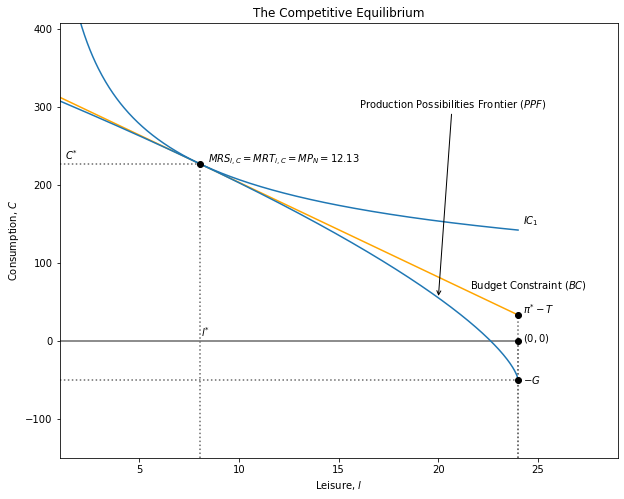

In [7]:
def plot_eq_details(): # function for adding components that plot the details
    ax.plot(optimal_l, optimal_C,'ro',color='black') # a black dot
    ax.text(optimal_l*1.05, optimal_C*1.005, f'$MRS_{{l,C}} = MRT_{{l,C}} = MP_{{N}} = {np.round(w, 2)}$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), min(C_bc),'ro',color='black') # a black dot
    ax.text(max(l)*1.01, min(C_bc)*1.05, r'$\pi^{{*}} - T$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), 0,'ro',color='black') # a black dot
    ax.text(max(l)*1.01, 0, r'$(0, 0)$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), min(PPF),'ro',color='black') # a black dot
    ax.text(max(l)*1.01, min(PPF)*1.10, r'$-G$') # add space to the text so it doesn't overlap with the lines
    ax.text(max(l)*1.01, 150, r'$IC_{1}$') # add space to the text so it doesn't overlap with the lines
    ax.text(optimal_l*1.01, 5, r'$l^{{*}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.25, optimal_C*1.02, r'$C^{{*}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(max(l)*0.90, min(C_bc)*2, r'Budget Constraint ($BC$)') # add space to the text so it doesn't overlap with the lines
    ax.annotate('Production Possibilities Frontier ($PPF$)', xy=(20, 55), xytext=(16, 300),
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
"""
Plot the Competitive Equilibrium
"""
fig, ax = plt.subplots(figsize=(10, 8))
v = [min(l), max(l)+5, min(PPF)-100, max(PPF)+100] # values for setting the axes range
ax.set(title="The Competitive Equilibrium", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
ax.hlines(y=min(PPF), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
ax.vlines(x=max(l), ymin=min(PPF)-100, ymax=0, color='dimgrey', linestyles='dotted')
ax.vlines(x=max(l), ymin=min(PPF)-100, ymax=min(C_bc), color='dimgrey', linestyles='dotted')
ax.vlines(x=optimal_l, ymin=min(PPF)-100, ymax=optimal_C, color='dimgrey', linestyles='dotted')
ax.hlines(y=optimal_C, xmin=0, xmax=optimal_l, color='dimgrey', linestyles='dotted') 
ax.plot(l, C_bc, color='orange') # plot Consumer's budget constraint
ax.plot(l, PPF, color='tab:blue') # plot Y against N_d
ax.plot(l, C_indifference, color='tab:blue') # plot Consumer's Indifference Curve
ax.axis(v)
plot_eq_details()

## The Pareto Optimum <a name="#ParetoOp"></a>

The Pareto Optimum is identical to the competitive equilibrium. The section of code below plots the Pareto Optimum.

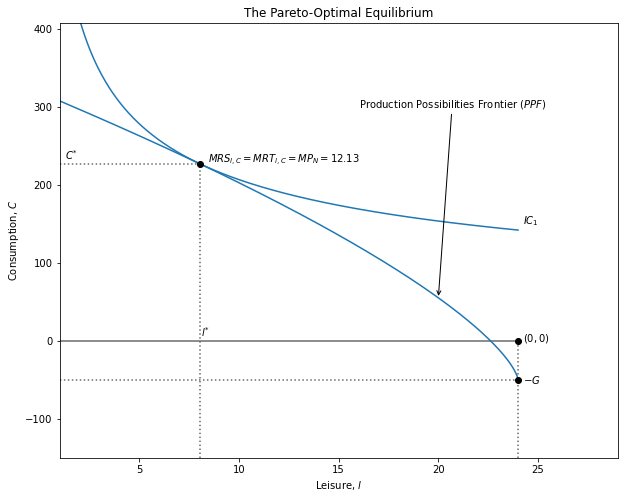

In [8]:
"""
Plot the Pareto-Optimal Equilibrium
"""
def plot_pareto_details():
    ax.set(title="The Pareto-Optimal Equilibrium", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
    ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
    ax.hlines(y=min(PPF), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
    ax.vlines(x=max(l), ymin=min(PPF)-100, ymax=0, color='dimgrey', linestyles='dotted')
    ax.vlines(x=optimal_l, ymin=min(PPF)-100, ymax=optimal_C, color='dimgrey', linestyles='dotted')
    ax.hlines(y=optimal_C, xmin=0, xmax=optimal_l, color='dimgrey', linestyles='dotted')
    ax.plot(optimal_l, optimal_C,'ro',color='black') # a black dot
    ax.text(optimal_l*1.05, optimal_C*1.005, f'$MRS_{{l,C}} = MRT_{{l,C}} = MP_{{N}} = {np.round(w, 2)}$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), 0,'ro',color='black') # a black dot
    ax.text(max(l)*1.01, 0, r'$(0, 0)$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), min(PPF),'ro',color='black') # a black dot
    ax.text(max(l)*1.01, min(PPF)*1.10, r'$-G$') # add space to the text so it doesn't overlap with the lines
    ax.text(max(l)*1.01, 150, r'$IC_{1}$') # add space to the text so it doesn't overlap with the lines
    ax.text(optimal_l*1.01, 5, r'$l^{{*}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.25, optimal_C*1.02, r'$C^{{*}}$') # add space to the text so it doesn't overlap with the lines
    ax.annotate('Production Possibilities Frontier ($PPF$)', xy=(20, 55), xytext=(16, 300),
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
    
fig, ax = plt.subplots(figsize=(10, 8))
v = [min(l), max(l)+5, min(PPF)-100, max(PPF)+100] # values for setting the axes range
ax.plot(l, PPF, color='tab:blue') # plot Y against N_d
ax.plot(l, C_indifference, color='tab:blue') # plot Consumer's Indifference Curve
ax.axis(v)
plot_pareto_details()

## Scenario I: A Change in Government Expenditures (G) <a name="ChangeinG"></a>

In this scenario, I calculated and plotted the results when there is a change in government expenditures. I created two separate results, one under the initial level of government expenditures ($G_{1}$) and the second under the new level of government expenditures ($G_{2}$) and then I plotted these two results together. 

In [10]:
"""
Set the exogenous/static variables
"""
hours = 24
alpha_cons = 0.3
alpha_firm = 0.3
g_1 = 50 # tax level/level of government expenditures
g_2 = 100 # tax level/level of government expenditures
K = 100 # a fixed capital stock value
N_bar = 10 # fixed level of labour input
z_1 = 10 # value of total factor productivity

"""
Set arrays for the One-Period Macroeconomic Model
"""
oneperiod_mod = one_period_macromod(hours, alpha_cons, alpha_firm)
l = oneperiod_mod.leisure() # leisure array;
N = hours - l # array for employment;
Y = oneperiod_mod.production_function(N, K, z_1) # the production function

As mentioned previously, values under the new level of government expenditures are labelled with the underscore mark (i.e. `objective_`, `optimal_l_`, etc.

In [11]:
def objective(l, hours = hours, g = g_1, K = K, z = z_1):
    N = hours - l
    C = oneperiod_mod.PPF(N, g, K, z)
    return -oneperiod_mod.utility_function(l, C)

result = minimize_scalar(objective)
optimal_l = result.x # get optimal leisure
optimal_N = hours - optimal_l
w = oneperiod_mod.MPN(K, optimal_N, z_1) # real wage
optimal_Y = oneperiod_mod.production_function(optimal_N, K, z_1) # optimal production
optimal_VC = oneperiod_mod.variable_cost(w, optimal_N) # optimal variable cost
optimal_pi = optimal_Y - optimal_VC # optimal profit
optimal_C = oneperiod_mod.budget_constraint(optimal_l, w, optimal_pi, g_1) # derive optimal Consumption
optimal_U = oneperiod_mod.utility_function(optimal_l, optimal_C) # solve for optimal Utility

def objective_(l, hours = hours, g = g_2, K = K, z = z_1):
    N = hours - l
    C = oneperiod_mod.PPF(N, g, K, z)
    return -oneperiod_mod.utility_function(l, C)

result_ = minimize_scalar(objective_)
optimal_l_ = result_.x # get optimal leisure
optimal_N_ = hours - optimal_l_
w_ = oneperiod_mod.MPN(K, optimal_N_, z_1) # real wage
optimal_Y_ = oneperiod_mod.production_function(optimal_N_, K, z_1) # optimal production
optimal_VC_ = oneperiod_mod.variable_cost(w_, optimal_N_) # optimal variable cost
optimal_pi_ = optimal_Y_ - optimal_VC_ # optimal profit
optimal_C_ = oneperiod_mod.budget_constraint(optimal_l_, w_, optimal_pi_, g_2) # derive optimal Consumption
optimal_U_ = oneperiod_mod.utility_function(optimal_l_, optimal_C_) # solve for optimal Utility

PPF = oneperiod_mod.PPF(N, g_1, K, z_1) # the production possibilities frontier
C_bc = oneperiod_mod.budget_constraint(l, w, optimal_pi, g_1) # the representative consumer's budget constraint
C_indifference = oneperiod_mod.indifference_curve(l, optimal_U) # indifference curve

PPF_ = oneperiod_mod.PPF(N, g_2, K, z_1) # the production possibilities frontier
C_bc_ = oneperiod_mod.budget_constraint(l, w_, optimal_pi_, g_2) # the representative consumer's budget constraint
C_indifference_ = oneperiod_mod.indifference_curve(l, optimal_U_) # indifference curve

After solving the optimal values under different levels of government expenditures, I plotted the change in $G$. We can see that under this model, an increase in government expenditures crowds out consumption. The change in government expenditures exhibits a pure negative income effect. Since the government cannot run deficits, an increase in $G$ must result in an increase in $T$ which reduces the representative consumer's disposable income.

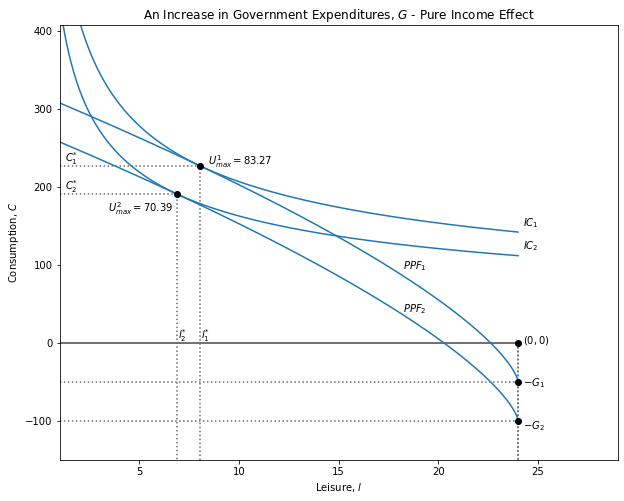

In [12]:
"""
Plot Scenario for Increase in G
"""
def plot_scenario1_details():
    ax.set(title=r"An Increase in Government Expenditures, $G$ - Pure Income Effect", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
    # text for optimization problem under original tax level
    ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
    ax.hlines(y=min(PPF), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
    ax.vlines(x=max(l), ymin=min(PPF)-100, ymax=0, color='dimgrey', linestyles='dotted')
    ax.vlines(x=optimal_l, ymin=min(PPF)-100, ymax=optimal_C, color='dimgrey', linestyles='dotted')
    ax.hlines(y=optimal_C, xmin=0, xmax=optimal_l, color='dimgrey', linestyles='dotted')
    ax.plot(optimal_l, optimal_C,'ro',color='black') # a black dot
    ax.text(optimal_l*1.05, optimal_C*1.005, f'$U_{{max}}^{{1}} = {np.round(optimal_U, 2)}$') # add space to the text so it doesn't overlap with the lines
    # text for optimization problem under new tax level
    ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
    ax.hlines(y=min(PPF_), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
    ax.vlines(x=max(l), ymin=min(PPF_)-100, ymax=0, color='dimgrey', linestyles='dotted')
    ax.vlines(x=optimal_l_, ymin=min(PPF_)-100, ymax=optimal_C_, color='dimgrey', linestyles='dotted')
    ax.hlines(y=optimal_C_, xmin=0, xmax=optimal_l_, color='dimgrey', linestyles='dotted')
    ax.plot(optimal_l_, optimal_C_,'ro',color='black') # a black dot
    ax.text(optimal_l_*0.50, optimal_C_*0.88, f'$U_{{max}}^{{2}} = {np.round(optimal_U_, 2)}$') # add space to the text so it doesn't overlap with the lines
    # additional details for the graph
    ax.plot(max(l), 0,'ro',color='black') # a black dot
    ax.text(max(l)*1.01, 0, r'$(0, 0)$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), min(PPF),'ro',color='black') # a black dot
    ax.text(max(l)*1.01, min(PPF)*1.10, r'$-G_{{1}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(max(l)*1.01, 150, r'$IC_{1}$') # add space to the text so it doesn't overlap with the lines (IC 1)
    ax.text(max(l)*1.01, 120, r'$IC_{2}$') # add space to the text so it doesn't overlap with the lines (IC 2)
    ax.text(optimal_l*1.01, 5, r'$l^{{*}}_{{1}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.25, optimal_C*1.02, r'$C^{{*}}_{{1}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(optimal_l_*1.01, 5, r'$l^{{*}}_{{2}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.25, optimal_C_*1.03, r'$C^{{*}}_{{2}}$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), min(PPF_),'ro',color='black') # a black dot
    ax.text(max(l)*1.01, min(PPF_)*1.10, r'$-G_{{2}}$') # text indicating new level of G
    # Labels for PPF
    ax.text(18.25, 95, r'$PPF_{1}$') # PPF label 2
    ax.text(18.25, 40, r'$PPF_{2}$') # PPF label 1
    
fig, ax = plt.subplots(figsize=(10, 8))
v = [min(l), max(l)+5, min(PPF)-100, max(PPF)+100] # values for setting the axes range
ax.plot(l, PPF, color='tab:blue') # plot Y against N_d
ax.plot(l, C_indifference, color='tab:blue') # plot Consumer's Indifference Curve
ax.plot(l, PPF_, color='tab:blue') # plot Y against N_d
ax.plot(l, C_indifference_, color='tab:blue') # plot Consumer's Indifference Curve
ax.axis(v)
plot_scenario1_details()

## Scenario II: A Change in The Total Factor Productivity (TFP) <a name="ChangeInTFP"></a>

In this scenario, I calculated and plotted the results when there is a change in Total Factor Productivity (TFP), $z$. The set-up for solving new values under the old and new TFP are similar to scenario I. 

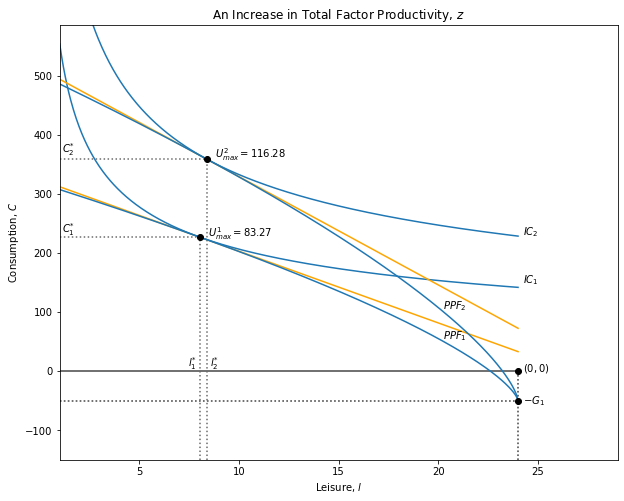

In [9]:
"""
Scenario: Increase in total factor productivity
"""
hours = 24
alpha_cons = 0.3
alpha_firm = 0.3
g_1 = 50 # tax level/level of government expenditures
K = 100 # a fixed capital stock value
z_1 = 10 # value of total factor productivity
z_2 = 15 # new value of total factor productivity

"""
Set arrays for the One-Period Macroeconomic Model
"""
oneperiod_mod = one_period_macromod(hours, alpha_cons, alpha_firm)
l = oneperiod_mod.leisure() # leisure array;
N = hours - l # array for employment;

# objective function 
def objective(l, hours = hours, g = g_1, K = K, z = z_1):
    N = hours - l
    C = oneperiod_mod.PPF(N, g, K, z)
    return -oneperiod_mod.utility_function(l, C)

# solve the new optimal solution 
result = minimize_scalar(objective) #
optimal_l = result.x # get optimal leisure
optimal_N = hours - optimal_l # optimal employment
w = oneperiod_mod.MPN(K, optimal_N, z_1) # real wage
optimal_Y = oneperiod_mod.production_function(optimal_N, K, z_1) # optimal production
optimal_VC = oneperiod_mod.variable_cost(w, optimal_N) # optimal variable cost
optimal_pi = optimal_Y - optimal_VC # optimal profit
optimal_C = oneperiod_mod.budget_constraint(optimal_l, w, optimal_pi, g_1) # derive optimal Consumption
optimal_U = oneperiod_mod.utility_function(optimal_l, optimal_C) # solve for optimal Utility

# objective function 
def objective_(l, hours = hours, g = g_1, K = K, z = z_2):
    N = hours - l
    C = oneperiod_mod.PPF(N, g, K, z_2)
    return -oneperiod_mod.utility_function(l, C)

# solve the new optimal solution under new level of z
result_ = minimize_scalar(objective_)
optimal_l_ = result_.x # get optimal leisure
optimal_N_ = hours - optimal_l_ # optimal employment
w_ = oneperiod_mod.MPN(K, optimal_N_, z_2) # new real wage
optimal_Y_ = oneperiod_mod.production_function(optimal_N_, K, z_2) # optimal production
optimal_VC_ = oneperiod_mod.variable_cost(w_, optimal_N_) # optimal variable cost
optimal_pi_ = optimal_Y_ - optimal_VC_ # optimal profit
optimal_C_ = oneperiod_mod.budget_constraint(optimal_l_, w_, optimal_pi_, g_1) # derive optimal Consumption
optimal_U_ = oneperiod_mod.utility_function(optimal_l_, optimal_C_) # solve for optimal Utility

"""
Plot the increase in z
"""
PPF = oneperiod_mod.PPF(N, g_1, K, z_1) # production possibilities frontier
C_bc = oneperiod_mod.budget_constraint(l, w, optimal_pi, g_1) # the representative consumer's budget constraint
PPF_ = oneperiod_mod.PPF(N, g_1, K, z_2) # production possibilities frontier
C_bc_ = oneperiod_mod.budget_constraint(l, w_, optimal_pi_, g_1) # the representative consumer's budget constraint

def plot_scenario2_details():
    ax.set(title=r"An Increase in Total Factor Productivity, $z$", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
    # text for optimization problem under original tax level
    ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
    ax.hlines(y=min(PPF), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
    ax.vlines(x=max(l), ymin=min(PPF)-100, ymax=0, color='dimgrey', linestyles='dotted')
    ax.vlines(x=optimal_l, ymin=min(PPF)-100, ymax=optimal_C, color='dimgrey', linestyles='dotted')
    ax.hlines(y=optimal_C, xmin=0, xmax=optimal_l, color='dimgrey', linestyles='dotted')
    ax.plot(optimal_l, optimal_C,'ro',color='black') # a black dot
    ax.text(optimal_l*1.05, optimal_C*1.005, f'$U_{{max}}^{{1}} = {np.round(optimal_U, 2)}$') # add space to the text so it doesn't overlap with the lines
    def plot_new_tax_level():
        # text for optimization problem under new tax level
        ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
        ax.hlines(y=min(PPF_), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
        ax.vlines(x=max(l), ymin=min(PPF_)-100, ymax=0, color='dimgrey', linestyles='dotted')
        ax.vlines(x=optimal_l_, ymin=min(PPF_)-100, ymax=optimal_C_, color='dimgrey', linestyles='dotted')
        ax.hlines(y=optimal_C_, xmin=0, xmax=optimal_l_, color='dimgrey', linestyles='dotted')
        ax.plot(optimal_l_, optimal_C_,'ro',color='black') # a black dot
        ax.text(optimal_l_*1.05, optimal_C_*1.005, f'$U_{{max}}^{{2}} = {np.round(optimal_U_, 2)}$') # add space to the text so it doesn't overlap with the lines
    def plot_additional_details_graph():
        # additional details for the graph
        ax.plot(max(l), 0,'ro',color='black') # a black dot
        ax.text(max(l)*1.01, 0, r'$(0, 0)$') # add space to the text so it doesn't overlap with the lines
        ax.plot(max(l), min(PPF),'ro',color='black') # a black dot
        ax.text(max(l)*1.01, min(PPF)*1.10, r'$-G_{{1}}$') # add space to the text so it doesn't overlap with the lines
        ax.text(max(l)*1.01, 150, r'$IC_{1}$') # add space to the text so it doesn't overlap with the lines (IC 1)
        ax.text(max(l)*1.01, 230, r'$IC_{2}$') # add space to the text so it doesn't overlap with the lines (IC 2)
        ax.text(optimal_l*0.93, 7, r'$l^{{*}}_{{1}}$') # add space to the text so it doesn't overlap with the lines
        ax.text(1.1, optimal_C*1.03, r'$C^{{*}}_{{1}}$') # add space to the text so it doesn't overlap with the lines
        ax.text(optimal_l_*1.02, 7, r'$l^{{*}}_{{2}}$') # add space to the text so it doesn't overlap with the lines
        ax.text(1.1, optimal_C_*1.03, r'$C^{{*}}_{{2}}$') # add space to the text so it doesn't overlap with the lines
    def PPF_labels():
        # Labels for PPF
        ax.text(20.25, 55, r'$PPF_{1}$') # PPF label 1
        ax.text(20.25, 105, r'$PPF_{2}$') # PPF label 2
    PPF_labels()
    plot_additional_details_graph()
    plot_new_tax_level()
    
fig, ax = plt.subplots(figsize=(10, 8))
v = [min(l), max(l)+5, min(PPF)-100, max(PPF_)+100] # values for setting the axes range
ax.set(title=r"An Increase in Total Factor Productivity, $z$", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
ax.plot(l, C_bc, color='orange') # plot Consumer's budget constraint
ax.plot(l, PPF, color='tab:blue') # plot the PPF against leisure
ax.plot(l, oneperiod_mod.indifference_curve(l,optimal_U), color='tab:blue') # plot Consumer's Indifference Curve
ax.plot(l, C_bc_, color='orange') # plot Consumer's budget constraint
ax.plot(l, PPF_, color='tab:blue') # plot the PPF against leisure
ax.plot(l, oneperiod_mod.indifference_curve(l,optimal_U_), color='tab:blue') # plot Consumer's Indifference Curve
ax.axis(v)
plot_scenario2_details()

## The Substitution Effect <a name="SE"></a>

Under a scenario where TFP increased, there are income and substitution effects at play. An increase in $z$ enables more output to be produced given a quantity of labour input and also increases the Marginal Product of Labour ($MP_{N}$) for each labour input, $N$. 

This means that while the output increased, $C$ also increased, improving the trade-off between $l$ and $C$. Under this scenario, while $C$ increased, $l$ may have increased or decreased. To determine the substitution effect, I implemented a solution similar to what I did on the representative consumer notes where I find the MRS that is equivalent the real wage under the new TFP. Then, to find the corresponding level of $G$, I wrote a function called `g_sub_solve` to find the corresponding $G$ under the substitution effect. 

In [17]:
def find_nearest_mrs(mrs, wage): # Python function for finding the nearest approximate value of MRS equivalent to real wage.
    mrs = np.asarray(mrs) # convert input into an array
    # Find least absolute value of the residual between the array and the desired value
    idx = np.nanargmin((np.abs(mrs - wage))) # idx, short for index, nanargmin returns indices of minimum values, ignoring NaNs if present in the NumPy array
    return mrs[idx] # return value of MRS that is an approximate match to real wage
# Place input into a pandas dataframe with the inputs of leisure, consumption and the resulting MRS
info = [] # empty list to append MRS, leisure, and consumption
info.append(oneperiod_mod.MRS(l, oneperiod_mod.indifference_curve(l, optimal_U))) # append MRS into list
info.append(l) # append leisure into list
info.append(oneperiod_mod.indifference_curve(l, optimal_U)) # append Consumption under old utility into list
info = pd.DataFrame(np.vstack(info)).round(2) # convert list into a Pandas dataframe and round all values in the dataframe.
info = info.T
info.columns = ['MRS', 'l', 'C'] # rename columns in the dataframe

# create an array containing values of MRS under old utility
mrs_values = oneperiod_mod.MRS(l, oneperiod_mod.indifference_curve(l, optimal_U)) 
# find the MRS that is approximately equal to the new real wage under the new TFP using find_nearest_mrs() 
mrs_match = find_nearest_mrs(mrs_values, w_).round(2) # round up values
# convert value to float to enable location/matching to dataframe
mrs_match = float(mrs_match) 

# find the value is leisure in the dataframe that matches the MRS that is approximately equal to 30.
l_sub = info['l'].loc[info['MRS'] == mrs_match] # locate value of leisure that corresponds to the matching MRS
l_sub = float(l_sub) # convert value to float
# calculate consumption along original indifference curve with leisure from substitution effect
C_sub = oneperiod_mod.indifference_curve(l_sub, optimal_U) 
N_sub = hours - l_sub # employment level under substitution effect

# Python function to calculate tax level/government expenditures given consumption and leisure under substitution effect
def g_sub_solve(C, N, K, z):
    return oneperiod_mod.production_function(N, K, z) - C # return the difference between Consumption and Production
g_sub = g_sub_solve(C_sub, N_sub, K, z_2) # solve for tax level given consumption and employment under substitution effect

PPF_sub = oneperiod_mod.PPF(N, g_sub, K, z_2) # production possibilities frontier
C_bc_sub = oneperiod_mod.budget_constraint(l, w_, optimal_pi_, g_sub) # the representative consumer's budget constraint

Afterwards, I plotted the results to show the substitution effect. All variables which point to the substitution effect are denoted with the subscript "sub". The substitution effect is the movement from $l_{1}^*$ to $l_{sub}^*$ while the income effect is the movement from $l_{sub}^*$ to $l_{2}^*$. 

(1.0, 29.0, -150.0, 586.1678194466515)

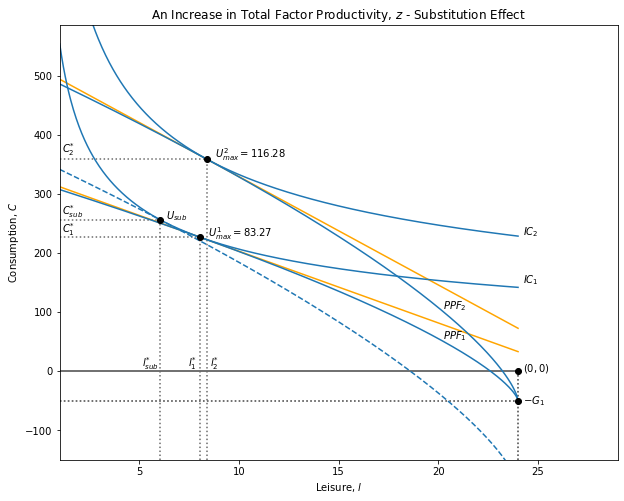

In [18]:
def plot_scenario2_details():
    ax.set(title=r"An Increase in Total Factor Productivity, $z$ - Substitution Effect", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
    # text for optimization problem under original tax level
    ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
    ax.hlines(y=min(PPF), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
    ax.vlines(x=max(l), ymin=min(PPF)-100, ymax=0, color='dimgrey', linestyles='dotted')
    ax.vlines(x=optimal_l, ymin=min(PPF)-100, ymax=optimal_C, color='dimgrey', linestyles='dotted')
    ax.hlines(y=optimal_C, xmin=0, xmax=optimal_l, color='dimgrey', linestyles='dotted')
    ax.plot(optimal_l, optimal_C,'ro',color='black') # a black dot
    ax.text(optimal_l*1.05, optimal_C*1.005, f'$U_{{max}}^{{1}} = {np.round(optimal_U, 2)}$') # add space to the text so it doesn't overlap with the lines
    # text for optimization problem under new tax level
    ax.hlines(y=0, xmin=0, xmax=max(l), color='dimgrey', linestyles='solid') # dot line indicating the origin and the x-axis
    ax.hlines(y=min(PPF_), xmin=0, xmax=max(l), color='dimgrey', linestyles='dotted') # dot line indicating level of G
    ax.vlines(x=max(l), ymin=min(PPF_)-100, ymax=0, color='dimgrey', linestyles='dotted')
    ax.vlines(x=optimal_l_, ymin=min(PPF_)-100, ymax=optimal_C_, color='dimgrey', linestyles='dotted')
    ax.hlines(y=optimal_C_, xmin=0, xmax=optimal_l_, color='dimgrey', linestyles='dotted')
    ax.plot(optimal_l_, optimal_C_,'ro',color='black') # a black dot
    ax.text(optimal_l_*1.05, optimal_C_*1.005, f'$U_{{max}}^{{2}} = {np.round(optimal_U_, 2)}$') # add space to the text so it doesn't overlap with the lines
    # additional details for the graph
    ax.plot(max(l), 0,'ro',color='black') # a black dot
    ax.text(max(l)*1.01, 0, r'$(0, 0)$') # add space to the text so it doesn't overlap with the lines
    ax.plot(max(l), min(PPF),'ro',color='black') # a black dot
    ax.text(max(l)*1.01, min(PPF)*1.10, r'$-G_{{1}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(max(l)*1.01, 150, r'$IC_{1}$') # add space to the text so it doesn't overlap with the lines (IC 1)
    ax.text(max(l)*1.01, 230, r'$IC_{2}$') # add space to the text so it doesn't overlap with the lines (IC 2)
    ax.text(optimal_l*0.93, 7, r'$l^{{*}}_{{1}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.1, optimal_C*1.03, r'$C^{{*}}_{{1}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(optimal_l_*1.02, 7, r'$l^{{*}}_{{2}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.1, optimal_C_*1.03, r'$C^{{*}}_{{2}}$') # add space to the text so it doesn't overlap with the lines
    # Labels for PPF
    ax.text(20.25, 55, r'$PPF_{1}$') # PPF label 1
    ax.text(20.25, 105, r'$PPF_{2}$') # PPF label 2

def plot_scenario2_details_subeff():
    ax.vlines(x=l_sub, ymin=min(PPF)-100, ymax=C_sub, color='dimgrey', linestyles='dotted')
    ax.hlines(y=C_sub, xmin=0, xmax=l_sub, color='dimgrey', linestyles='dotted')
    ax.plot(l_sub, C_sub,'ro',color='black') # a black dot
    ax.text(l_sub*1.05, C_sub*1.005, f'$U_{{sub}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(l_sub*0.85, 7, r'$l^{{*}}_{{sub}}$') # add space to the text so it doesn't overlap with the lines
    ax.text(1.1, C_sub*1.03, r'$C^{{*}}_{{sub}}$') # add space to the text so it doesn't overlap with the lines
    
fig, ax = plt.subplots(figsize=(10, 8))
v = [min(l), max(l)+5, min(PPF)-100, max(PPF_)+100] # values for setting the axes range
ax.set(title=r"An Increase in Total Factor Productivity, $z$", xlabel=r'Leisure, $l$', ylabel=r'Consumption, $C$')
ax.plot(l, C_bc, color='orange') # plot Consumer's budget constraint
ax.plot(l, C_bc_, color='orange') # plot Consumer's budget constraint
ax.plot(l, PPF, color='tab:blue') # plot the PPF against leisure
ax.plot(l, oneperiod_mod.indifference_curve(l,optimal_U), color='tab:blue') # plot Consumer's Indifference Curve
ax.plot(l, PPF_, color='tab:blue') # plot the PPF against leisure
ax.plot(l, oneperiod_mod.indifference_curve(l,optimal_U_), color='tab:blue') # plot Consumer's Indifference Curve
ax.plot(l, PPF_sub, color='tab:blue', linestyle= 'dashed') # plot the PPF against leisure
plot_scenario2_details()
plot_scenario2_details_subeff()
ax.axis(v)